# Alman Kredi Riskini Tahmin Etme

# 1) Verinin Keşfi (EDA)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
risk = pd.read_csv("../input/german-credit-data-with-risk/german_credit_data.csv", index_col = "Unnamed: 0")
df = risk.copy()

In [3]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
Job,1000.0,1.904,0.653614,0.0,2.0,2.0,2.00,3.0
Credit amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0


In [6]:
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

## 1.1) Değişkenlerin İncelenmesi

In [7]:
df["Job"].value_counts().sort_index()

0     22
1    200
2    630
3    148
Name: Job, dtype: int64

In [8]:
df["Housing"].value_counts()

own     713
rent    179
free    108
Name: Housing, dtype: int64

In [9]:
df["Saving accounts"].value_counts()

little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [10]:
df["Checking account"].value_counts()

little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

In [11]:
df["Purpose"].value_counts()

car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: Purpose, dtype: int64

In [12]:
df["Risk"].value_counts()

good    700
bad     300
Name: Risk, dtype: int64

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
Job,1000.0,1.904,0.653614,0.0,2.0,2.0,2.00,3.0
Credit amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0


In [14]:
df.corr()

,Age,Job,Credit amount,Duration
Age,1.000000,0.015673,0.032716,-0.036136
Job,0.015673,1.000000,0.285385,0.210910
Credit amount,0.032716,0.285385,1.000000,0.624984
Duration,-0.036136,0.210910,0.624984,1.000000


# 2) Age ve Duration Değişkenlerinin Kategorikleştirilmesi

In [15]:
for i in df["Age"]:
    if i < 25:
        df["Age"] = df["Age"].replace(i,"0-25")
    elif (i >= 25) and (i < 30):
        df["Age"] = df["Age"].replace(i,"25-30")
    elif (i >= 30) and (i < 35):
        df["Age"] = df["Age"].replace(i,"30-35")
    elif (i >= 35) and (i < 40):
        df["Age"] = df["Age"].replace(i,"35-40")
    elif (i >= 40) and (i < 50):
        df["Age"] = df["Age"].replace(i,"40-50")
    elif (i >= 50) and (i < 76):
        df["Age"] = df["Age"].replace(i,"50-75")

In [16]:
for i in df["Duration"]:
    if i < 12:
        df["Duration"] = df["Duration"].replace(i,"0-12")
    elif (i >= 12) and (i < 24):
        df["Duration"] = df["Duration"].replace(i,"12-24")
    elif (i >= 24) and (i < 36):
        df["Duration"] = df["Duration"].replace(i,"24-36")
    elif (i >= 36) and (i < 48):
        df["Duration"] = df["Duration"].replace(i,"36-48")
    elif (i >= 48) and (i < 60):
        df["Duration"] = df["Duration"].replace(i,"48-60")
    elif (i >= 60) and (i <= 72):
        df["Duration"] = df["Duration"].replace(i,"60-72")

In [17]:
df["Job"] = pd.Categorical(df["Job"], categories = [0,1,2,3], 
                           ordered = True)
df["Age"] = pd.Categorical(df["Age"], 
                           categories = ['0-25','25-30', '30-35','35-40','40-50','50-75'], 
                           ordered = True)
df["Duration"] = pd.Categorical(df["Duration"], 
                                categories = ['0-12','12-24', '24-36','36-48','48-60','60-72'], 
                                ordered = True)

# 3) Görselleştirme

## 3.1) Değişkenlerin Görselleştirilmesi

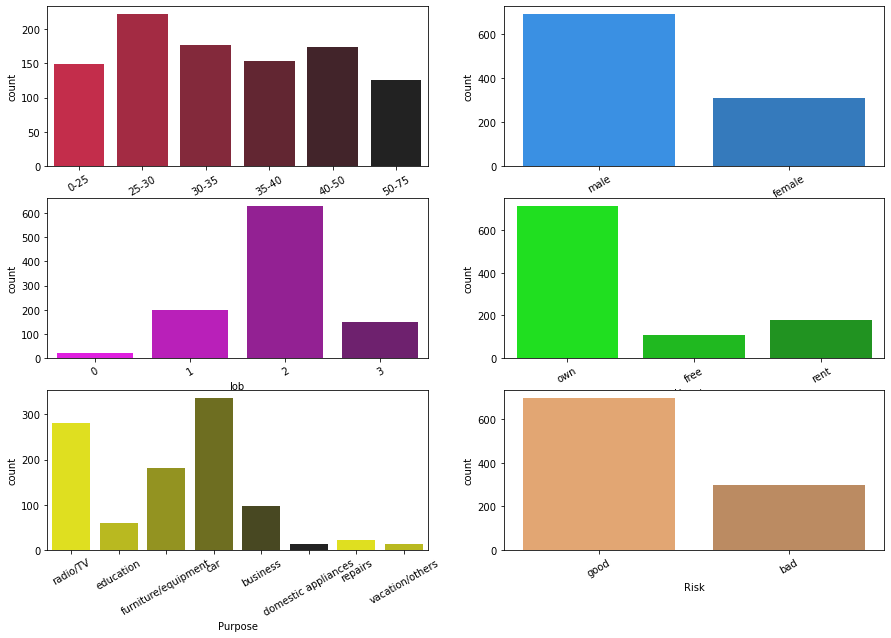

In [18]:
fig,ax = plt.subplots(ncols = 2, nrows = 3,figsize = (15, 10))
cat_list = ["Age", "Sex", "Job","Housing", "Purpose", "Risk"]
palette = ["crimson", "dodgerblue", "fuchsia", "lime","yellow", "sandybrown"]
count = 0
for i in range(3):
    for j in range(2):
        sns.countplot(df[cat_list[count]], ax = ax[i][j],
                      palette = sns.dark_palette(palette[count],
                                                 reverse=True))
        ax[i][j].set_xticklabels(ax[i][j].get_xticklabels(),rotation = 30)
        count += 1

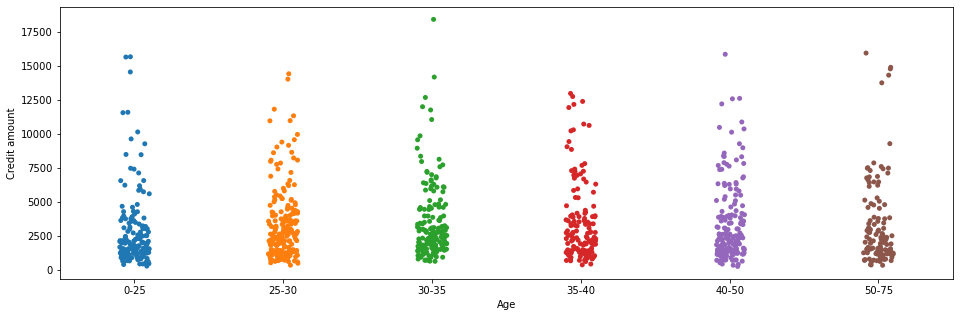

In [19]:
plt.figure(figsize = (16, 5))
sns.stripplot(x = "Age", y = "Credit amount", data = df)

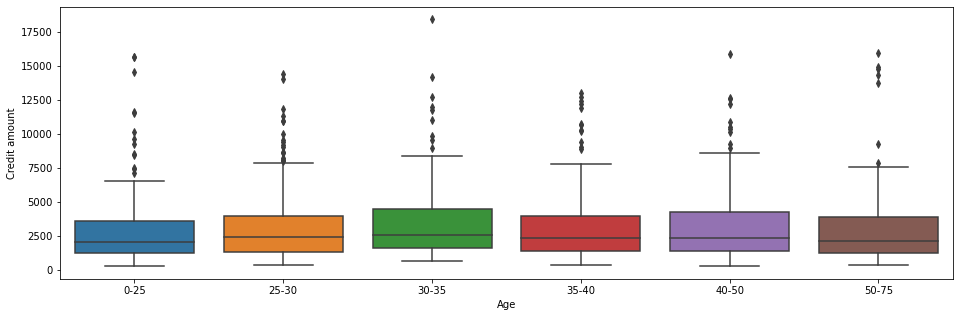

In [20]:
plt.figure(figsize = (16, 5))
sns.boxplot(x = "Age", y = "Credit amount",data = df)

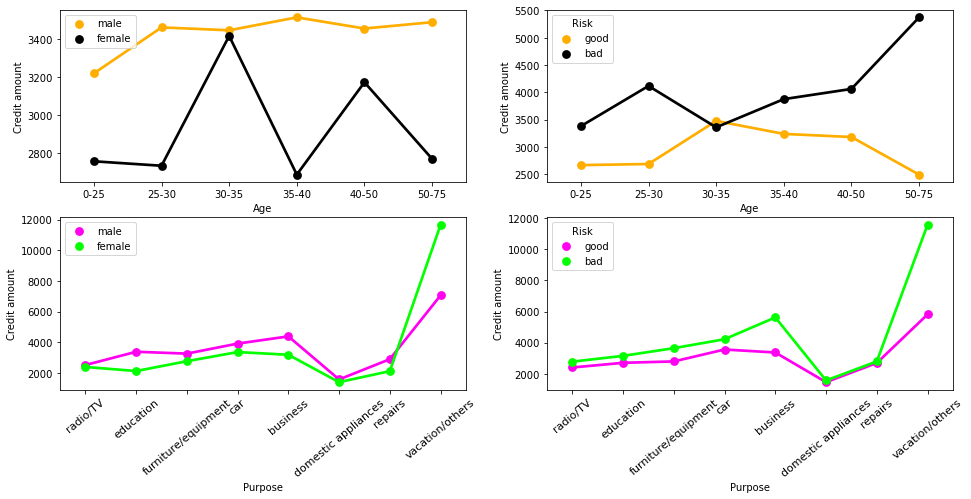

In [21]:
fig, ax = plt.subplots(ncols = 2, nrows = 2, figsize=(16, 7))
liste = ["Sex", "Risk"]
for i in range(2):
    count = 0
    sns.pointplot(x = "Age", y = "Credit amount", hue = liste[i], data = df, 
                  ax = ax[0][i], palette = ["#FFAE00","#000000"], ci = None)
    sns.pointplot(x = "Purpose", y = "Credit amount", hue = liste[i], data = df, 
                  ax = ax[1][i], palette = ["#FF00F0","#04FF00"], ci = None)
    ax[1][i].set_xticklabels(ax[1][i].get_xticklabels(), rotation = 40, size = 11)
    ax[i][count].legend(loc = "upper left")
    count += 1

## 3.2) Missing Value

In [22]:
import missingno as msno

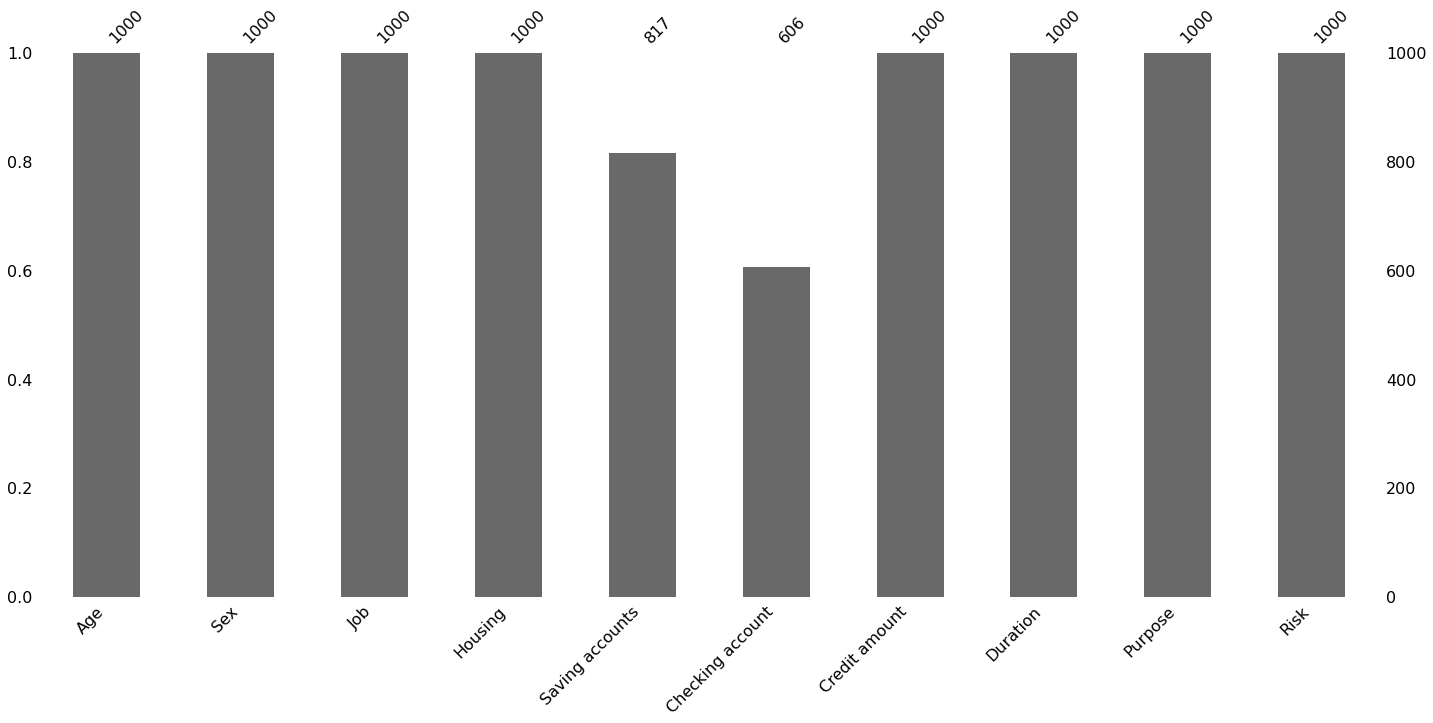

In [23]:
msno.bar(df)

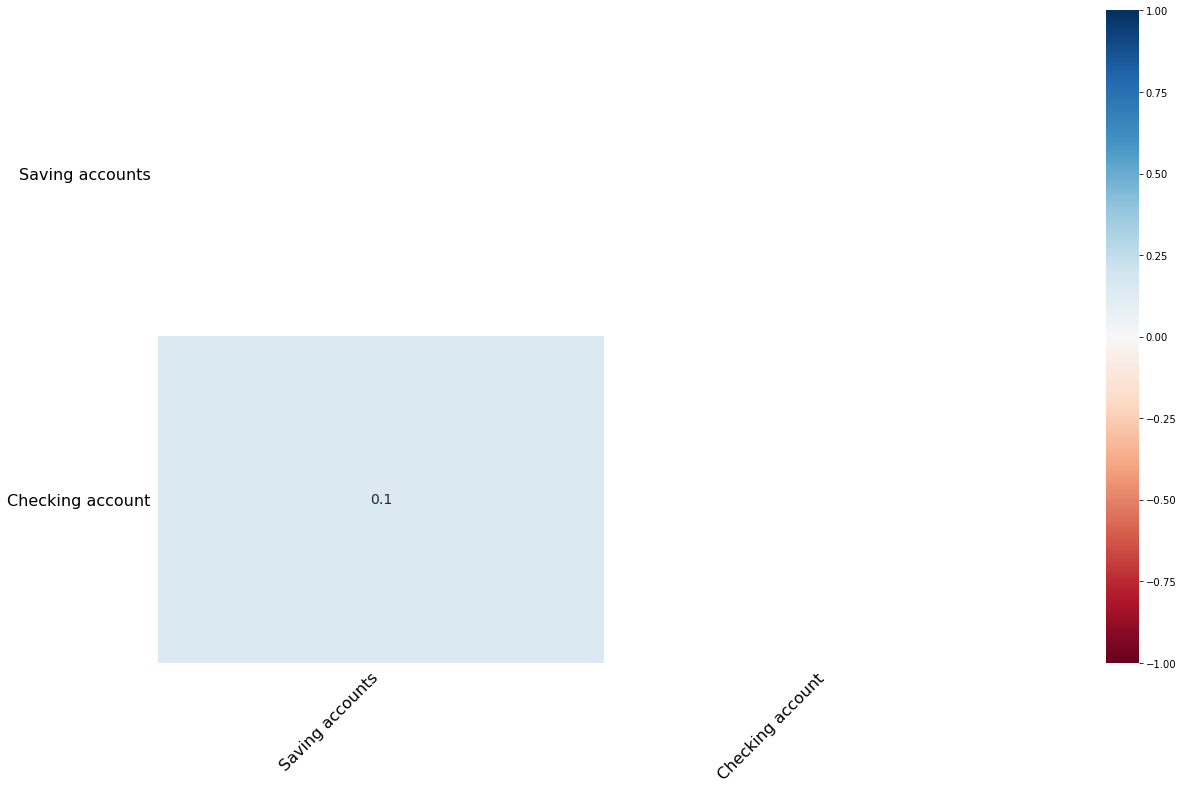

In [24]:
msno.heatmap(df)

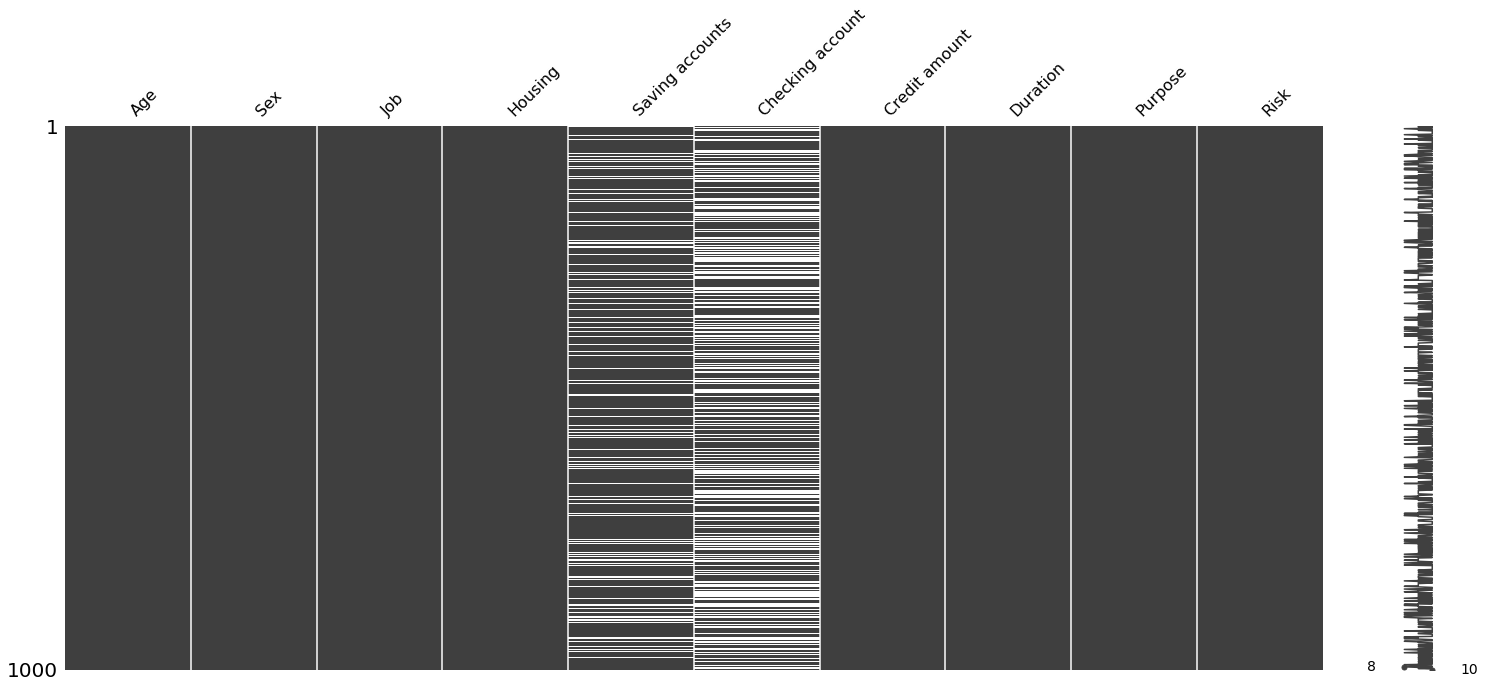

In [25]:
msno.matrix(df)

# 4) Eksik Değerlerin Doldurulması

In [26]:
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

## 4.1) Saving accounts

In [27]:
df["Saving accounts"].value_counts()

little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [28]:
df["Saving accounts"].fillna(df["Saving accounts"].mode()[0], inplace = True)

In [29]:
df["Saving accounts"].value_counts()

little        786
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

## 4.2) Checking account

In [30]:
df["Checking account"].value_counts()

little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

In [31]:
df["Checking account"].fillna(df["Checking account"].mode()[0], inplace = True)

In [32]:
df["Checking account"].value_counts()

little      668
moderate    269
rich         63
Name: Checking account, dtype: int64

In [33]:
df.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

# 5) Lojistik Regresyon Modeli

In [34]:
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [35]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,50-75,male,2,own,little,little,1169,0-12,radio/TV,good
1,0-25,female,2,own,little,moderate,5951,48-60,radio/TV,bad
2,40-50,male,1,own,little,little,2096,12-24,education,good
3,40-50,male,2,free,little,little,7882,36-48,furniture/equipment,good
4,50-75,male,2,free,little,little,4870,24-36,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,30-35,female,1,own,little,little,1736,12-24,furniture/equipment,good
996,40-50,male,3,own,little,little,3857,24-36,car,good
997,35-40,male,2,own,little,little,804,12-24,radio/TV,good
998,0-25,male,2,free,little,little,1845,36-48,radio/TV,bad


In [36]:
df_fit = df.apply(preprocessing.LabelEncoder().fit_transform)

In [37]:
df_fit

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,5,1,2,1,0,0,142,0,5,1
1,0,0,2,1,0,1,770,4,5,0
2,4,1,1,1,0,0,390,1,3,1
3,4,1,2,0,0,0,848,3,4,1
4,5,1,2,0,0,0,734,2,1,0
...,...,...,...,...,...,...,...,...,...,...
995,2,0,1,1,0,0,310,1,4,1
996,4,1,3,1,0,0,661,2,1,1
997,3,1,2,1,0,0,69,1,5,1
998,0,1,2,0,0,0,332,3,5,0


In [38]:
df_fit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Age               1000 non-null   int64
 1   Sex               1000 non-null   int64
 2   Job               1000 non-null   int64
 3   Housing           1000 non-null   int64
 4   Saving accounts   1000 non-null   int64
 5   Checking account  1000 non-null   int64
 6   Credit amount     1000 non-null   int64
 7   Duration          1000 non-null   int64
 8   Purpose           1000 non-null   int64
 9   Risk              1000 non-null   int64
dtypes: int64(10)
memory usage: 125.9 KB


In [39]:
y = df_fit["Risk"]
X = df_fit.drop(["Risk"], axis=1)

## 5.1) statsmodels

In [40]:
loj = sm.Logit(y, X)
loj_model= loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.571030
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Risk   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      991
Method:                           MLE   Df Model:                            8
Date:                Fri, 14 Aug 2020   Pseudo R-squ.:                 0.06521
Time:                        21:35:35   Log-Likelihood:                -571.03
converged:                       True   LL-Null:                       -610.86
Covariance Type:            nonrobust   LLR p-value:                 5.699e-14
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Age                  0.1678      0.044      3.779      0.000       0.081       0.255
Sex                  0.4382      0.153      2.870      0.004       0.139       0.737
Job                  0.0735      0.100      0.735      0.462      -0.122       0.269
Housing              0.1024      0.114      0.898      0.369      -0.121       0.326
Saving accounts      0.3520      0.105      3.357      0.001       0.146       0.557
Checking account    -0.1683      0.116     -1.457      0.145      -0.395       0.058
Credit amount        0.0007      0.000      1.930      0.054   -1.07e-05       0.001
Duration            -0.4796      0.081     -5.944      0.000      -0.638      -0.321
Purpose              0.1048      0.035      3.036      0.002       0.037       0.173
====================================================================================
"""

## 5.2) scikit-learn

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X,y)
loj_model

LogisticRegression(solver='liblinear')

In [43]:
loj_model.intercept_

array([0.54055451])

In [44]:
loj_model.coef_

array([[ 0.13918276,  0.39906819, -0.02354297, -0.02468167,  0.32981798,
        -0.18683519,  0.00060633, -0.48471656,  0.08564137]])

## 5.3) Tahmin & Model Tuning

In [45]:
y_pred = loj_model.predict(X)

In [46]:
confusion_matrix(y, y_pred)

array([[ 49, 251],
       [ 36, 664]])

In [47]:
accuracy_score(y, y_pred)

0.713

In [48]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.16      0.25       300
           1       0.73      0.95      0.82       700

    accuracy                           0.71      1000
   macro avg       0.65      0.56      0.54      1000
weighted avg       0.68      0.71      0.65      1000



In [49]:
loj_model.predict(X)[0:10]

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [50]:
loj_model.predict_proba(X)[0:10][:,0:2]

array([[0.11124614, 0.88875386],
       [0.68175107, 0.31824893],
       [0.1889562 , 0.8110438 ],
       [0.29904395, 0.70095605],
       [0.24054246, 0.75945754],
       [0.33999725, 0.66000275],
       [0.12789356, 0.87210644],
       [0.45641476, 0.54358524],
       [0.05411469, 0.94588531],
       [0.40955646, 0.59044354]])

In [51]:
y[0:10]

0    1
1    0
2    1
3    1
4    0
5    1
6    1
7    1
8    1
9    0
Name: Risk, dtype: int64

In [52]:
y_probs = loj_model.predict_proba(X)
y_probs = y_probs[:,1]

In [53]:
y_probs[0:10]

array([0.88875386, 0.31824893, 0.8110438 , 0.70095605, 0.75945754,
       0.66000275, 0.87210644, 0.54358524, 0.94588531, 0.59044354])

In [54]:
y_pred = [1 if i > 0.5 else 0 for i in y_probs]

In [55]:
y_pred[0:10]

[1, 0, 1, 1, 1, 1, 1, 1, 1, 1]

In [56]:
confusion_matrix(y, y_pred)

array([[ 49, 251],
       [ 36, 664]])

In [57]:
accuracy_score(y, y_pred)

0.713

In [58]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.16      0.25       300
           1       0.73      0.95      0.82       700

    accuracy                           0.71      1000
   macro avg       0.65      0.56      0.54      1000
weighted avg       0.68      0.71      0.65      1000



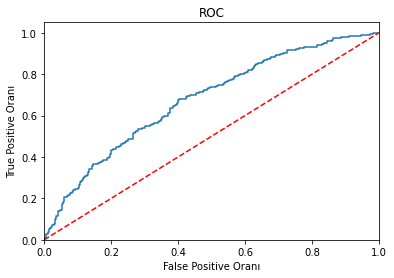

In [59]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30, 
                                                    random_state = 42)

In [61]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train,y_train)
loj_model

LogisticRegression(solver='liblinear')

In [62]:
accuracy_score(y_test, loj_model.predict(X_test))

0.7066666666666667

In [63]:
cross_val_score(loj_model, X_test, y_test, cv = 10).mean()

0.6933333333333334

# 6) Naive Bayes

In [64]:
from sklearn.naive_bayes import GaussianNB

In [65]:
y = df_fit["Risk"]
X = df_fit.drop(["Risk"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [66]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

GaussianNB()

In [67]:
nb_model.predict(X_test)[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [68]:
nb_model.predict_proba(X_test)[0:10]

array([[0.38746447, 0.61253553],
       [0.15074446, 0.84925554],
       [0.20097329, 0.79902671],
       [0.3621911 , 0.6378089 ],
       [0.43688895, 0.56311105],
       [0.24018769, 0.75981231],
       [0.1001893 , 0.8998107 ],
       [0.43200628, 0.56799372],
       [0.30152814, 0.69847186],
       [0.00178941, 0.99821059]])

In [69]:
y_pred = nb_model.predict(X_test)

In [70]:
accuracy_score(y_test, y_pred)

0.66

In [71]:
cross_val_score(nb_model, X_test, y_test, cv = 10).mean()

0.6466666666666665

# 7) Gradient Boosting Machines 

In [72]:
from sklearn.ensemble import GradientBoostingClassifier

In [73]:
y = df_fit["Risk"]
X = df_fit.drop(["Risk"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [74]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [75]:
y_pred = gbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.66

## 6.1) Model Tuning

In [76]:
from sklearn.model_selection import learning_curve, GridSearchCV

In [77]:
gbm_model

GradientBoostingClassifier()

In [78]:
gbm_params = {"learning_rate" : [0.001, 0.01, 0.1, 0.05],
             "n_estimators": [100,500,100],
             "max_depth": [3,5,10],
             "min_samples_split": [2,5,10]}

In [79]:
gbm = GradientBoostingClassifier()

gbm_cv = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)

In [80]:
gbm_cv.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   25.1s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  5.7min finished


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.05],
                         'max_depth': [3, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500, 100]},
             verbose=2)

In [81]:
print("En iyi parametreler: " + str(gbm_cv.best_params_))

En iyi parametreler: {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 100}


In [82]:
gbm = GradientBoostingClassifier(learning_rate = 0.01, 
                                 max_depth = 5,
                                min_samples_split = 10,
                                n_estimators = 100)

In [83]:
gbm_tuned =  gbm.fit(X_train,y_train)

In [84]:
y_pred = gbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7133333333333334

In [85]:
cross_val_score(gbm_model, X_test, y_test, cv = 10).mean()

0.6833333333333333